# Homework 11

## Problem 1: Classification with angles

In the workbook, we saw that we could build distance-based classifiers using $k$-nearest neighbors. In this problem, we will investigate a simple angle-based classifier. 

Our data will be generated as follows: the features $x_1,\dots, x_n$ will be sampled uniformly on the sphere $S^{d-1} = \{x : \|x\|_2 = 1\}$, and the labels (either $-1$ or $1$) will be generated via $y_ i =  \text{sign}(w_\star^\top x_i)$, where $w_\star$ is some fixed vector, and $\text{sign}(z) = \begin{cases}1 & \text{if } z\geq 0\\ -1 & \text{if } z<0\end{cases}$. The following function will generate $n$ samples from this distribution in $d$ dimensions.

In [80]:
import numpy as np

def generate_data(n,d):
    np.random.seed(123)
    w_star = np.random.normal(size=d)
    X = np.random.normal(size=(n,d))
    norms= np.linalg.norm(X,axis=1)
    X = (X.T/np.linalg.norm(X,axis=1)).T
    y = np.sign(np.dot(X,w_star))
    return X, y

For example, let's visualize an example dataset in $d=2$ dimensions.

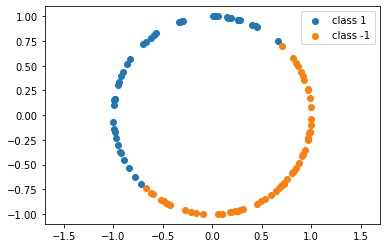

In [81]:
import matplotlib.pyplot as plt

X,y = generate_data(n=100, d=2)

plt.scatter(X[y==1,0], X[y==1,1], label='class 1')
plt.scatter(X[y==-1,0], X[y==-1,1], label='class -1')
plt.legend()
plt.axis('equal')
plt.show()

Our goal is to build a classifier to classify whether a new testing point is in class 1 or class -1. We will do this using angles, as follows. Given a training set of $n$ points, $(x_1,y_1),\dots,(x_n,y_n)$ and a new testing points $x_*$, we compute the angle between $x_*$ and each of the training points $x_1,\dots, x_n$:

$$
\theta_i = \arccos(x_i^\top x_*),\;\;\; i=1,\dots, n.
$$

(Note that since the training and testing points are all unit vectors in this case, we don't need to normalize them when we compute the angle.)

Then, we find the training point which is nearest in angle to $x_*$:

$$
i_* = \arg\min_i \theta_i
$$

and assign $x_*$ the label of this nearest point, $y_{i_*}$. Note that this is really a "1-nearest neighbor" classifier, where instead of using distances to characterize "near", we are using angles.

Perform the following:
- For each $d \in \{2,4,6,8,\dots,198,200\}$, generate a training dataset of $n= 100$ training points, and a separate testing set of $n_{\text{test}} = 500$ points.
- For each value of $d$, find the angle between each of the training and testing points, and use these to classify each of the testing points. 
- Evaluate the accuracy of the classifier, by checking what fraction of testing points were correctly classified by your classifier.

Finally, plot the test accuracies as a function of $d$. What happens to the test accuracy as $d$ grows? Based on Problem 1 in the previous homework, why do you think this is?

A few hints:

1. Note that you can compute all the pairwise dot products between the testing and training points with the matrix $X_{\text{test}}X_{\text{train}}^\top$. The angles can then be found by applying `np.arccos()` to this matrix.
2. You can use the `np.argmin()` function (and possibly the `axis` argument) to find the minimum angle.

## Problem 2: Visualizing quadratic forms with level sets

Recall from the workbook that a convenient was to visualize quadratic forms $f(x) = x^\top A x$ is to look at the _level sets_ of the function $f$. The $\lambda$-level set of $f$ is the set $\Omega_\lambda = \{x : f(x) = \lambda\}$. In this problem, we will practice visualizing quadratic forms using level sets, and see that we can characterize the definiteness of the matrix $A$ by looking at the level sets of $f(x) = x^\top A x$. In this problem, we will focus on $2\times 2$ matrices $A$, so that everything can be plotted easily.

First, we'll give an example of plotting a level set using the `contour` function in matplotlib, where here we use $A=I$ as an example.

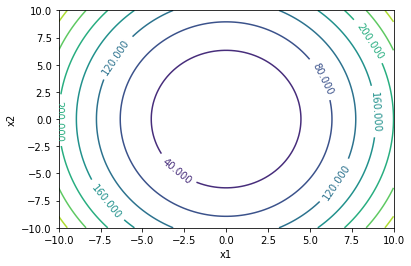

In [98]:
def f(x1, x2, A):
    ## implements a basic quadratic form f(x) = x^T A x
    return A[0,0]*x1**2 + A[0,1]*x1*x2 + A[1,0]*x2*x1 + A[1,1]*x2**2

x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)

A = np.array([[1,0],[0,1]])

X1, X2 = np.meshgrid(x1, x2)
X3 = f(X1,X2,A)

contours = plt.contour(X1, X2, X3)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Part A

Define a non-diagonal matrix $A$ which is _strictly_ negative semi-definite, that is, a matrix $A$ such that $f(x) = x^\top A x \leq 0$ for all $x$, but that $f(x) = x^\top A x = 0$ for some nonzero vector $x$. Plot the level curves of $f$. What shape are the level curves? Should this shape be the same for all strictly negative semi-definite matrices?

### Part B

Define a non-diagonal matrix $A$ which is indefinite, that is, a matrix $A$ such that $f(x) = x^\top A x < 0$ for some $x$, $>0$ for other $x$. Plot the level curves of $f$. What shape are the level curves? Should this shape be the same for all indefinite matrices?

### Part C
Recall that the matrix which rotates a vector by $\theta$ degrees is given by

$$
R_\theta = \begin{bmatrix} \cos(\theta) &  -\sin(\theta)\\ \sin(\theta) &\cos(\theta)\end{bmatrix}.
$$

Define a non-diagonal positive definite matrix $A$, that is, a matrix $A$ such that $f(x) = x^\top A x >0$ for all $x\neq 0$. Plot the level curves of $f$. Then, define $A_\theta = R_\theta A$, and plot the level curves of $f_\theta(x) = x^\top A_\theta x$ for $\theta = \pi/4, \pi/2$. What happens to the level curves when you apply the rotation to $A$? Does the defininiteness of the matrix $A$ change after applying the rotation?

### Part D
When we are in dimensions higher than 2, it is difficult to visualize the level sets of functions. For example, if $A$ is a $5\times 5$ matrix, then the level sets of $f(x) = x^\top A x$ are subsets of $\mathbb{R}^5$, which we can't visualize easily. One approach in these situations is to look at _slices_ of the level sets $\Omega_\lambda$. For instance, we could look at just the first two coordinates of each of the vectors. In this case, we could use the matrix

$$
I_2 = \begin{bmatrix} 1 & 0 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 & 0\end{bmatrix}
$$

so that

$$
I_2x = \begin{bmatrix} 1 & 0 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 & 0\end{bmatrix}\begin{bmatrix}x_1\\ x_2\\ x_3 \\ x_4 \\x_5\end{bmatrix} = \begin{bmatrix} x_1 \\ x_2\end{bmatrix}
$$

and look at the sets $\{I_2 x : x^\top A x = \lambda\}$. 

Pick an arbitrary $5\times 5$ symmetric matrix $A$ (you could do this by taking $A = B^\top B$ for some random matrix $B$), and visualize the level sets along the first two dimensions, using the method above. (Hint: you should be able to use a similar approach to the previous parts: compute the values $f(x) = x^\top A x$, and then pass the `plt.contour` function the `X1` and `X2` values that you obtain after applying the matrix $I_2$.) 